In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pandas import read_excel

path = "/content/drive/MyDrive/Major/Dataset8.xlsx"

df = read_excel(path)

In [ ]:
# prompt: update scikit-learn package to 1.4.1.post1 version

!pip install scikit-learn==1.4.1.post1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
print(df.head())
print(df.dtypes)
print(df.shape)
print(df.columns)

                     Incident  Offender           Victim                Harm  \
0  Steal of Confidential Data    Hacker       IT Company  Loss of Reputation   
1             Fake dealership  Criminal  St Cruz Company        Loss of Data   
2  Steal of Confidential Data    Hacker          Company  Loss of Reputation   
3                   OTP Theft  Criminal       Individual      Financial Loss   
4             Duping a Person  Criminal       Individual    Loss of Identity   

   Year   Location      State       Amount                Attack  
0  2022  Hyderabad  Telangana          NaN  Industrial Espionage  
1  2022        Goa        Goa  12.75 Lakhs  Industrial Espionage  
2  2022    Chennai  TamilNadu          NaN  Industrial Espionage  
3  2022    Chennai  TamilNadu        59000    Social Engineering  
4  2022      Delhi      Delhi     50 Lakhs        Identity theft  
Incident    object
Offender    object
Victim      object
Harm        object
Year         int64
Location    object
Sta

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

cols = ['Incident', 'Offender', 'Victim', 'Harm']

def preprocess_text(text):
    try:
      text = text.lower()
    except:
      print(text)
      return

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    processed_text = ' '.join(tokens)

    return processed_text

for column in cols:
    df[column] = df[column].fillna("")
    df[column] = df[column].apply(preprocess_text)

print(df)

                            Incident  Offender           Victim  \
0            steal confidential data    hacker          company   
1                    fake dealership  criminal  st cruz company   
2            steal confidential data    hacker          company   
3                          otp theft  criminal       individual   
4                      duping person  criminal       individual   
..                               ...       ...              ...   
441           real estate firm fraud  criminal          company   
442   malware attack private company    hacker          company   
443        phishing scam bank detail  criminal       individual   
444  fake identity ( social medium )  criminal       individual   
445                       start scam  criminal       individual   

                Harm  Year   Location        State       Amount  \
0    loss reputation  2022  Hyderabad    Telangana          NaN   
1          loss data  2022        Goa          Goa  12.75 Lak

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Attack'])
Y = df['Attack']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_text = X_train['Incident'] + ' ' + X_train['Offender'] + ' ' + X_train['Harm'] + ' ' + X_train['Victim']
X_test_text = X_test['Incident'] + ' ' + X_test['Offender'] + ' ' + X_test['Harm'] + ' ' + X_test['Victim']

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)

y_test_encoded = label_encoder.transform(y_test)

In [ ]:
features_names = vectorizer.get_feature_names_out()
print(features_names)

['account' 'actor' 'advisor' 'adware' 'agency' 'agent' 'analyst'
 'architect' 'army' 'atm' 'attack' 'authority' 'authorized' 'bank'
 'banking' 'bill' 'blackmailing' 'breach' 'bsf' 'business' 'card' 'care'
 'cbi' 'ceo' 'chain' 'close' 'cloud' 'company' 'compromise' 'confidential'
 'corporate' 'credential' 'credit' 'criminal' 'cruz' 'crypto'
 'cryptocurrency' 'currency' 'customer' 'data' 'database' 'dating'
 'dealer' 'dealership' 'debit' 'designer' 'detail' 'device' 'drdo'
 'duping' 'educational' 'electricity' 'email' 'embassy' 'emi' 'employee'
 'engineer' 'engineering' 'espionage' 'execu' 'executive' 'fake' 'finance'
 'financial' 'fraud' 'freelance' 'friend' 'government' 'hack' 'hacker'
 'healthcare' 'hims' 'ia' 'identity' 'identiy' 'impersonation' 'income'
 'individual' 'infestation' 'information' 'insider' 'institution'
 'insurance' 'intellectual' 'investment' 'investor' 'iot' 'ip' 'job' 'kyc'
 'leak' 'loan' 'loss' 'malicious' 'malware' 'manager' 'manufacturing'
 'marketing' 'medical'

# ***SVM***

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='rbf', max_iter=300)
svm_classifier.fit(X_train_tfidf, y_train)

predictions_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Classification report
classification_report_svm = classification_report(y_test, predictions_svm)

print('\nSVM Classification Report:')
print(classification_report_svm)

SVM Accuracy: 0.99

SVM Classification Report:
                      precision    recall  f1-score   support

      Identity theft       1.00      0.97      0.99        34
Industrial Espionage       1.00      0.92      0.96        13
             Malware       0.96      1.00      0.98        25
  Social Engineering       0.98      1.00      0.99        62

            accuracy                           0.99       134
           macro avg       0.99      0.97      0.98       134
        weighted avg       0.99      0.99      0.98       134



In [ ]:
X_svm_results = X_test.copy()
X_svm_results['Attack'] = Y
X_svm_results['Predicted Attack'] = predictions_svm
X_svm_results = X_svm_results.drop(columns=['Amount', 'Location'])
print(X_svm_results)

                               Incident  Offender      Victim            Harm  \
284                 business email scam  criminal  individual  financial loss   
358             fake identity ( tutor )  criminal  individual  financial loss   
117          credential stuffing attack    hacker  individual  financial loss   
423  phishing scam targeting job seeker  criminal  individual  financial loss   
70                      matrimony fraud  criminal  individual  financial loss   
..                                  ...       ...         ...             ...   
153                          loan fraud  criminal  individual  financial loss   
131                       fake identity  criminal  individual   loss identity   
26    fake identity ( laywer , police )  criminal  individual   loss identity   
7                             kyc theft  criminal  individual  financial loss   
405                          loan fraud  criminal  individual  financial loss   

     Year           State  

***Attacks Year Wise***

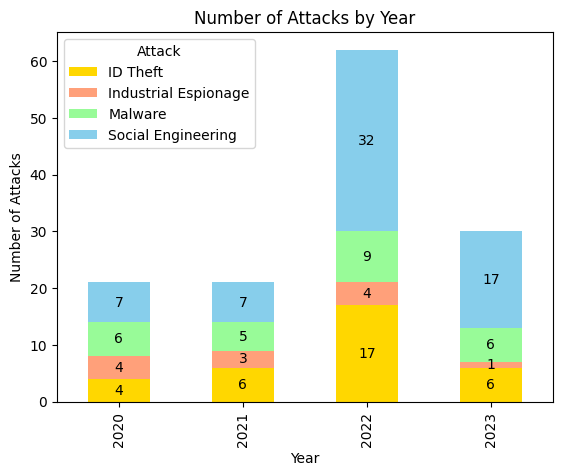

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

attacks_by_year_svm = X_svm_results.pivot_table(index='Year', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_year_svm ['Total Attacks'] = attacks_by_year_svm .sum(axis=1)

attacks_by_year_svm = attacks_by_year_svm.rename(columns={
    'ID Theft': 'ID theft',
    'Industrial Espionage': 'IE',
    'Malware': 'Malware',
    'Social Engineering': 'SE'
})

attacks_by_year_svm.columns.name = 'Attack'
attacks_by_year_svm.index.name = 'Year'

#print(attacks_by_year_svm)

attacks_by_year_svm.drop('Total Attacks', axis=1, inplace=True)

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

ax = attacks_by_year_svm.plot(kind='bar', stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year')

plt.show()

***Attacks Location Wise***

In [ ]:
attacks_by_location_svm = X_svm_results.pivot_table(index='Location', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_location_svm['Total Attacks'] = attacks_by_location_svm.sum(axis=1)

attacks_by_location_svm = attacks_by_location_svm.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_location_svm.columns.name = 'Attack'
attacks_by_location_svm.index.name = 'Year'

attacks_by_location_svm.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_location_svm)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_location_svm.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by City')

plt.show()

KeyError: 'Location'

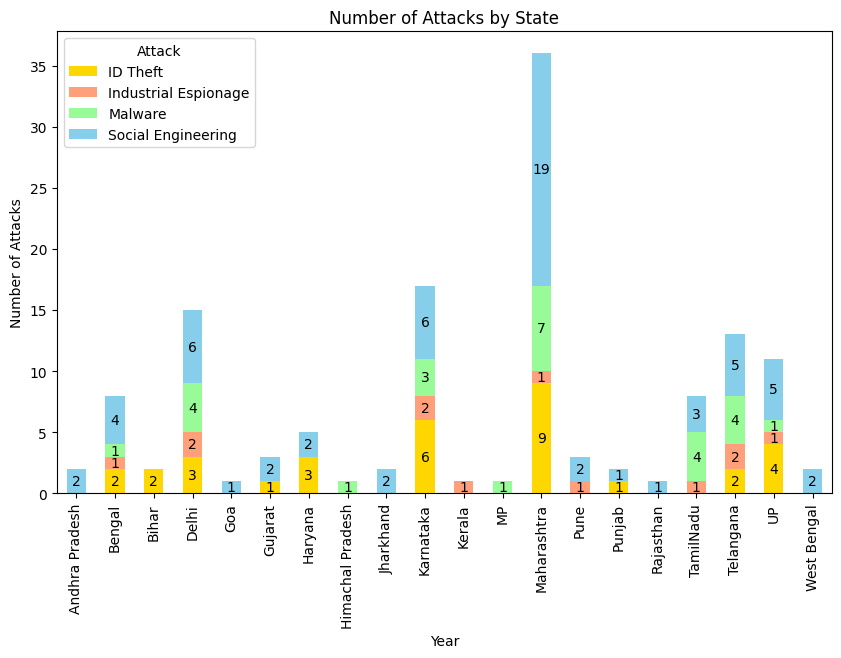

In [ ]:
attacks_by_state_svm = X_svm_results.pivot_table(index='State', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_state_svm['Total Attacks'] = attacks_by_state_svm.sum(axis=1)

attacks_by_state_svm = attacks_by_state_svm.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_state_svm.columns.name = 'Attack'
attacks_by_state_svm.index.name = 'Year'

attacks_by_state_svm.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_state_svm)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_state_svm.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by State')

plt.show()

***Performance Analysis SVM***

In [ ]:
predictions_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, predictions_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Classification report
classification_report_svm = classification_report(y_test, predictions_svm)

print('\nSVM Classification Report:')
print(classification_report_svm)

SVM Accuracy: 0.97

SVM Classification Report:
                      precision    recall  f1-score   support

      Identity theft       1.00      0.97      0.99        34
Industrial Espionage       0.92      0.85      0.88        13
             Malware       0.92      0.96      0.94        25
  Social Engineering       0.98      1.00      0.99        62

            accuracy                           0.97       134
           macro avg       0.96      0.94      0.95       134
        weighted avg       0.97      0.97      0.97       134



***Confusion Matrix***

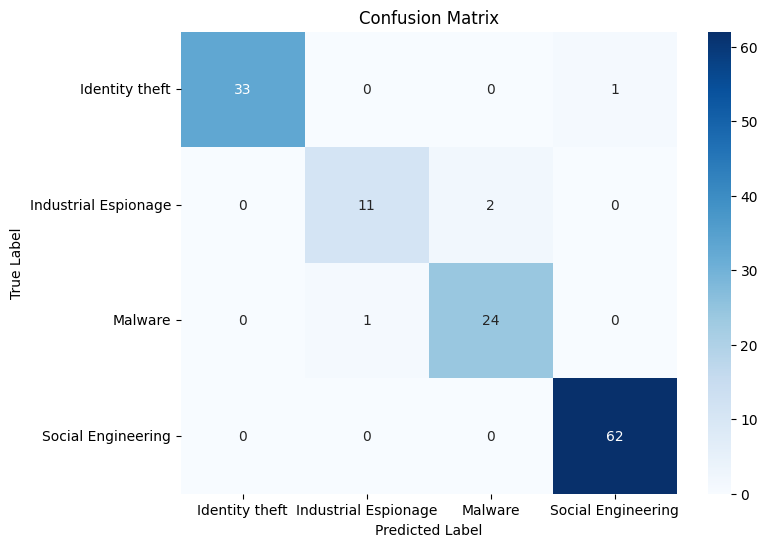

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
different_predictions_svm = X_svm_results[X_svm_results['Attack'] != X_svm_results['Predicted Attack']]

different_predictions_svm.to_excel("MisClassified_SVM.xlsx", index=False)
print(different_predictions_svm)

                           Incident  Offender      Victim  \
403                     data breach    hacker     company   
422          malware attack website    hacker     company   
286                   phishing scam  criminal  individual   
383  data breach e-commerce company    hacker     company   

                           Harm  Year      State                Attack  \
403                   loss data  2020  Telangana  Industrial Espionage   
422  loss intellectual property  2020     Kerala               Malware   
286              financial loss  2023  Telangana        Identity theft   
383                   loss data  2020  Telangana  Industrial Espionage   

         Predicted Attack  
403               Malware  
422  Industrial Espionage  
286    Social Engineering  
383               Malware  


# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

X_train_dense = X_train_tfidf.toarray()

naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_dense, y_train)

X_test_dense = X_test_tfidf.toarray()

predictions_nb = naive_bayes_classifier.predict(X_test_dense)

accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

classification_report_nb = classification_report(y_test, predictions_nb)
print('\nNaive Bayes Classification Report:')
print(classification_report_nb)

Naive Bayes Accuracy: 0.92

Naive Bayes Classification Report:
                      precision    recall  f1-score   support

      Identity theft       0.94      0.91      0.93        34
Industrial Espionage       0.85      0.85      0.85        13
             Malware       0.85      0.92      0.88        25
  Social Engineering       0.95      0.94      0.94        62

            accuracy                           0.92       134
           macro avg       0.90      0.90      0.90       134
        weighted avg       0.92      0.92      0.92       134



In [ ]:
X_nb_results = X_test.copy()
X_nb_results['Attack'] = Y
X_nb_results['Predicted Attack'] = predictions_nb
print(X_nb_results)

                               Incident  Offender      Victim            Harm  \
284                 business email scam  criminal  individual  financial loss   
358             fake identity ( tutor )  criminal  individual  financial loss   
117          credential stuffing attack    hacker  individual  financial loss   
423  phishing scam targeting job seeker  criminal  individual  financial loss   
70                      matrimony fraud  criminal  individual  financial loss   
..                                  ...       ...         ...             ...   
153                          loan fraud  criminal  individual  financial loss   
131                       fake identity  criminal  individual   loss identity   
26    fake identity ( laywer , police )  criminal  individual   loss identity   
7                             kyc theft  criminal  individual  financial loss   
405                          loan fraud  criminal  individual  financial loss   

     Year        Location  

***Attacks Year Wise***

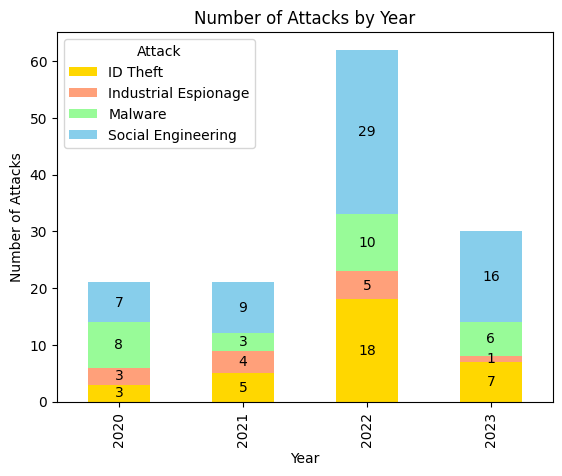

In [ ]:
import pandas as pd

attacks_by_year_nb = X_nb_results.pivot_table(index='Year', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_year_nb['Total Attacks'] = attacks_by_year_nb.sum(axis=1)

attacks_by_year_nb = attacks_by_year_nb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_year_nb.columns.name = 'Attack'
attacks_by_year_nb.index.name = 'Year'

#print(attacks_by_year_nb)

attacks_by_year_nb.drop('Total Attacks', axis=1, inplace=True)

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

ax = attacks_by_year_nb.plot(kind='bar', stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year')

plt.show()

***Attacks Location Wise***

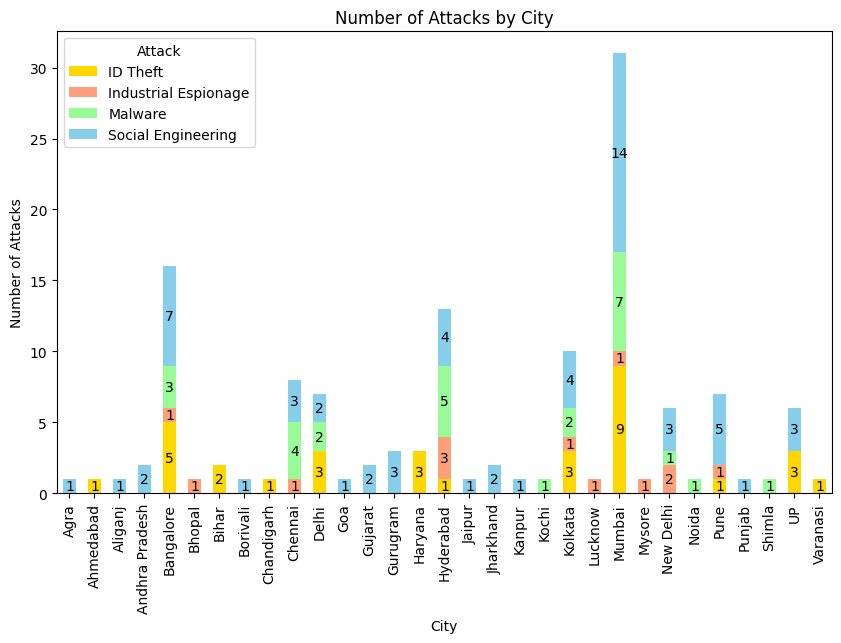

In [ ]:
attacks_by_location_nb = X_nb_results.pivot_table(index='Location', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_location_nb['Total Attacks'] = attacks_by_location_nb.sum(axis=1)

attacks_by_location_nb = attacks_by_location_nb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_location_nb.columns.name = 'Attack'
attacks_by_location_nb.index.name = 'Year'

#print(attacks_by_location_nb)

attacks_by_location_nb.drop('Total Attacks', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_location_nb.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('City')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by City')

plt.show()

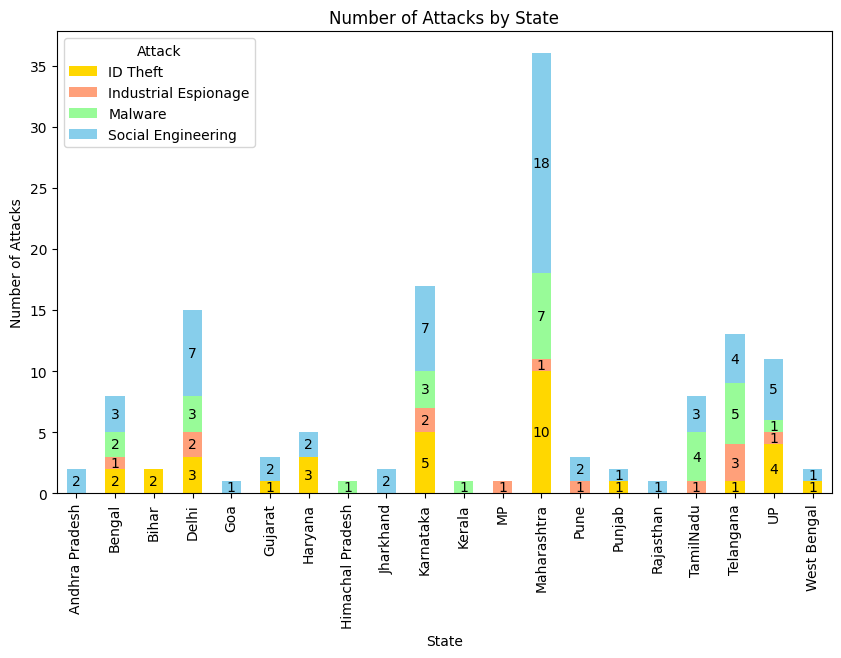

In [ ]:
attacks_by_state_nb = X_nb_results.pivot_table(index='State', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_state_nb['Total Attacks'] = attacks_by_state_nb.sum(axis=1)

attacks_by_state_nb = attacks_by_state_nb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_state_nb.columns.name = 'Attack'
attacks_by_state_nb.index.name = 'Year'

attacks_by_state_nb.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_state_nb)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_state_nb.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('State')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by State')

plt.show()

***Performance Analysis Naive Bayes***

In [ ]:
accuracy_nb = accuracy_score(y_test, predictions_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

classification_report_nb = classification_report(y_test, predictions_nb)
print('\nNaive Bayes Classification Report:')
print(classification_report_nb)

Naive Bayes Accuracy: 0.92

Naive Bayes Classification Report:
                      precision    recall  f1-score   support

      Identity theft       0.94      0.91      0.93        34
Industrial Espionage       0.85      0.85      0.85        13
             Malware       0.85      0.92      0.88        25
  Social Engineering       0.95      0.94      0.94        62

            accuracy                           0.92       134
           macro avg       0.90      0.90      0.90       134
        weighted avg       0.92      0.92      0.92       134



***Confusion Matrix Naive Bayes***

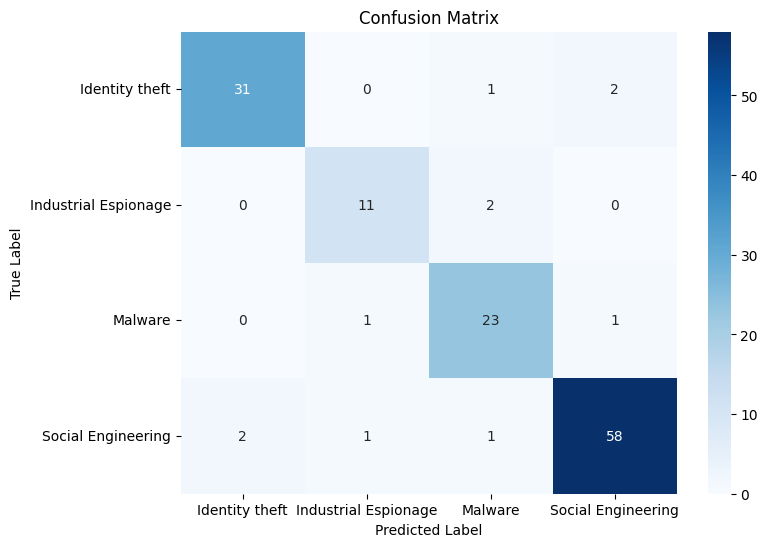

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
different_predictions_nb = X_nb_results[X_nb_results['Attack'] != X_nb_results['Predicted Attack']]

different_predictions_nb.to_excel("MisClassified_NB.xlsx", index=False)
print(different_predictions_nb)

                                   Incident  Offender           Victim  \
403                             data breach    hacker          company   
116                    online auction fraud    hacker  system software   
157      fake identity ( credential theft )  criminal       individual   
113                    cryptojacking attack  criminal  system software   
286                           phishing scam  criminal       individual   
425       retired officer bank detail theft  criminal       individual   
437  social engineering attack retail chain  criminal          company   
239                         phishing attack    hacker          company   
317  identity theft ( government official )  criminal       individual   
399     social medium influencer data theft  criminal       individual   
383          data breach e-commerce company    hacker          company   

               Harm  Year   Location        State     Amount  \
403       loss data  2020  Hyderabad    Telanga

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

predictions_rf = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report
classification_report_rf = classification_report(y_test, predictions_rf)
print('\nRandom Forest Classification Report:')
print(classification_report_rf)

Random Forest Accuracy: 0.98

Random Forest Classification Report:
                      precision    recall  f1-score   support

      Identity theft       1.00      0.97      0.99        34
Industrial Espionage       1.00      0.85      0.92        13
             Malware       0.93      1.00      0.96        25
  Social Engineering       0.98      1.00      0.99        62

            accuracy                           0.98       134
           macro avg       0.98      0.95      0.96       134
        weighted avg       0.98      0.98      0.98       134



In [ ]:
X_rf_results = X_test.copy()
X_rf_results['Attack'] = Y
X_rf_results['Predicted Attack'] = predictions_rf
print(X_rf_results)

                               Incident  Offender      Victim            Harm  \
284                 business email scam  criminal  individual  financial loss   
358             fake identity ( tutor )  criminal  individual  financial loss   
117          credential stuffing attack    hacker  individual  financial loss   
423  phishing scam targeting job seeker  criminal  individual  financial loss   
70                      matrimony fraud  criminal  individual  financial loss   
..                                  ...       ...         ...             ...   
153                          loan fraud  criminal  individual  financial loss   
131                       fake identity  criminal  individual   loss identity   
26    fake identity ( laywer , police )  criminal  individual   loss identity   
7                             kyc theft  criminal  individual  financial loss   
405                          loan fraud  criminal  individual  financial loss   

     Year        Location  

***Attacks Year Wise***

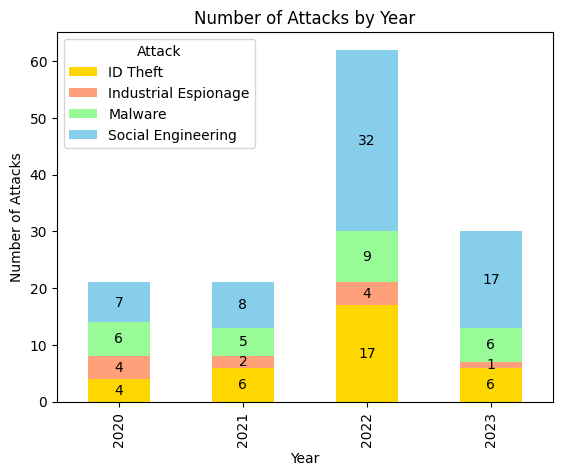

In [ ]:
import pandas as pd

attacks_by_year_rf = X_rf_results.pivot_table(index='Year', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_year_rf['Total Attacks'] = attacks_by_year_rf.sum(axis=1)

attacks_by_year_rf = attacks_by_year_rf.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_year_rf.columns.name = 'Attack'
attacks_by_year_rf.index.name = 'Year'

#print(attacks_by_year_rf)

attacks_by_year_rf.drop('Total Attacks', axis=1, inplace=True)

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

ax = attacks_by_year_rf.plot(kind='bar', stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year')

plt.show()

***Attacks Location Wise***

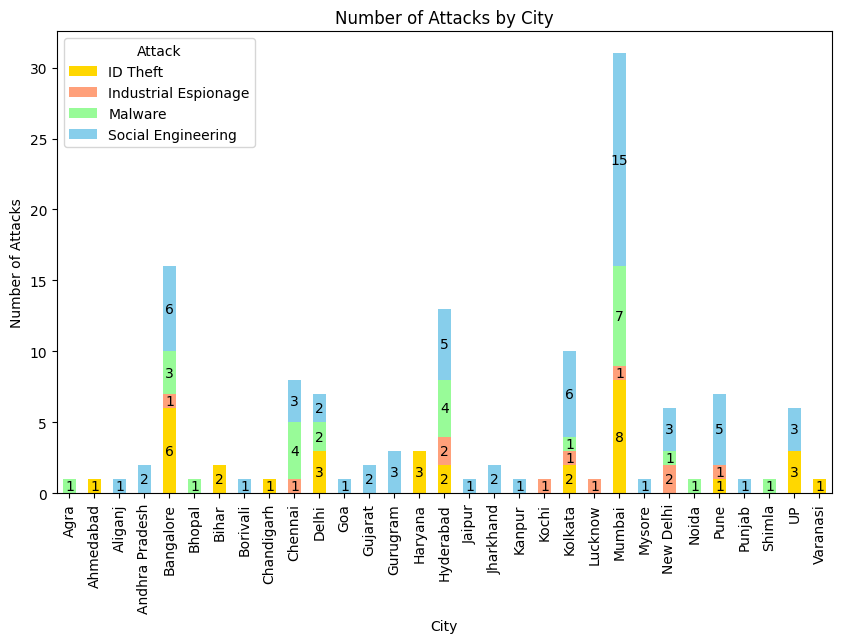

In [ ]:
attacks_by_location_rf = X_rf_results.pivot_table(index='Location', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_location_rf['Total Attacks'] = attacks_by_location_rf.sum(axis=1)

attacks_by_location_rf = attacks_by_location_rf.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_location_rf.columns.name = 'Attack'
attacks_by_location_rf.index.name = 'Year'

#print(attacks_by_location_rf)

attacks_by_location_rf.drop('Total Attacks', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_location_rf.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('City')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by City')

plt.show()

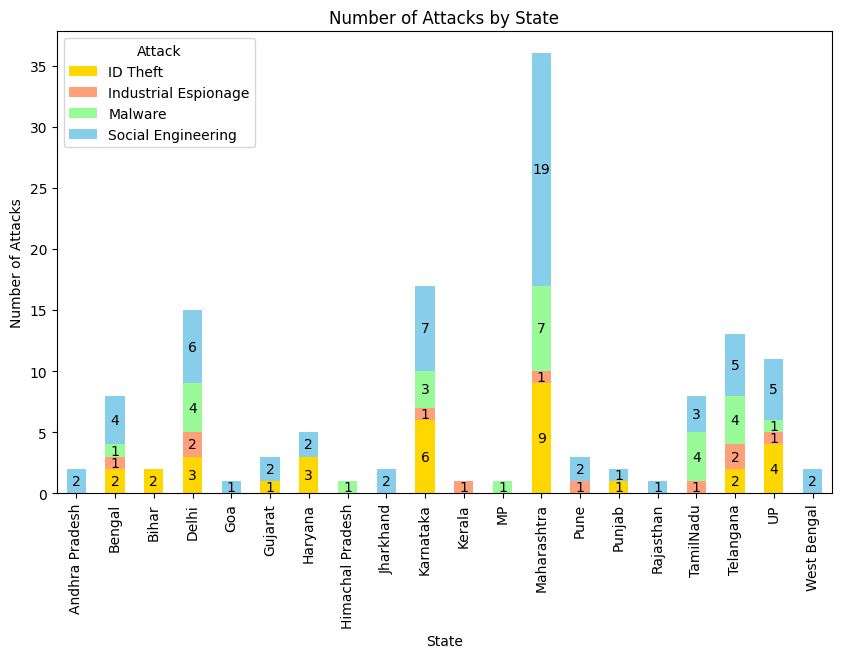

In [ ]:
attacks_by_state_rf = X_rf_results.pivot_table(index='State', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_state_rf['Total Attacks'] = attacks_by_state_rf.sum(axis=1)

attacks_by_state_rf = attacks_by_state_rf.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_state_rf.columns.name = 'Attack'
attacks_by_state_rf.index.name = 'Year'

attacks_by_state_rf.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_state_rf)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_state_rf.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('State')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by State')

plt.show()

***Performance Analysis Random Forest***

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report
classification_report_rf = classification_report(y_test, predictions_rf)
print('\nRandom Forest Classification Report:')
print(classification_report_rf)

Random Forest Accuracy: 0.96

Random Forest Classification Report:
                      precision    recall  f1-score   support

      Identity theft       1.00      0.97      0.99        34
Industrial Espionage       0.91      0.77      0.83        13
             Malware       0.92      0.96      0.94        25
  Social Engineering       0.97      1.00      0.98        62

            accuracy                           0.96       134
           macro avg       0.95      0.92      0.94       134
        weighted avg       0.96      0.96      0.96       134



***Confusion Matrix Random Forest***

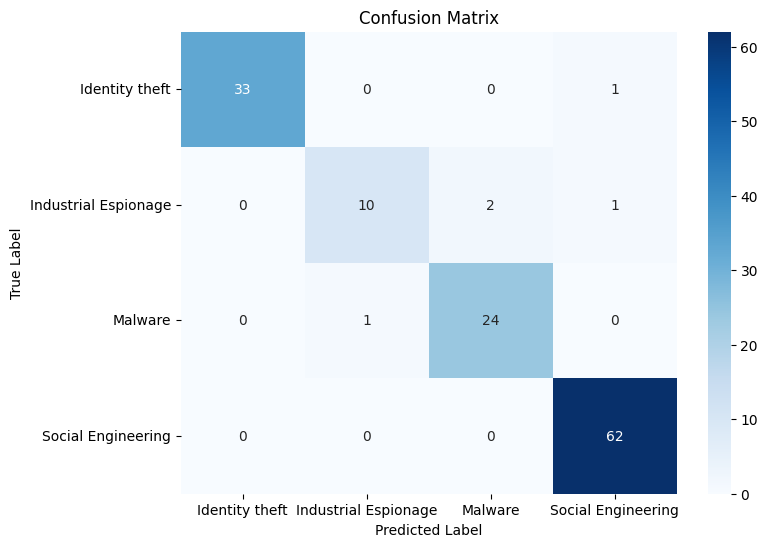

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, predictions_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
different_predictions_rf = X_rf_results[X_rf_results['Attack'] != X_rf_results['Predicted Attack']]

different_predictions_rf.to_excel("MisClassified_RF.xlsx", index=False)
print(different_predictions_rf)

                           Incident  Offender      Victim  \
403                     data breach    hacker     company   
126         cyber extortion company  criminal     company   
422          malware attack website    hacker     company   
286                   phishing scam  criminal  individual   
383  data breach e-commerce company    hacker     company   

                           Harm  Year   Location      State     Amount  \
403                   loss data  2020  Hyderabad  Telangana        NaN   
126             loss reputation  2021     Mysore  Karnataka      40000   
422  loss intellectual property  2020      Kochi     Kerala      88000   
286              financial loss  2023  Hyderabad  Telangana  2.3 Lakhs   
383                   loss data  2020  Hyderabad  Telangana    9 Lakhs   

                   Attack      Predicted Attack  
403  Industrial Espionage               Malware  
126  Industrial Espionage    Social Engineering  
422               Malware  Industrial 

# **XGBoost**

In [ ]:
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=400, random_state=42, max_depth=2)
xgb_classifier.fit(X_train_tfidf, y_train_encoded)

predictions_xgb = xgb_classifier.predict(X_test_tfidf)

accuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

classification_report_xgb = classification_report(y_test_encoded, predictions_xgb)
print('\nXGBoost Classification Report:')
print(classification_report_xgb)

XGBoost Accuracy: 0.97

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.92      0.92      0.92        13
           2       0.96      0.96      0.96        25
           3       0.97      0.98      0.98        62

    accuracy                           0.97       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.97      0.97      0.97       134



In [ ]:
accuracy_xgb = accuracy_score(y_test_encoded, predictions_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

classification_report_xgb = classification_report(y_test_encoded, predictions_xgb)
print('\nXGBoost Classification Report:')
print(classification_report_xgb)

In [ ]:
X_xgb_results = X_test.copy()
X_xgb_results['Attack'] = y_test_encoded
X_xgb_results['Predicted Attack'] = predictions_xgb
X_xgb_results = X_xgb_results.drop(columns=['Amount', 'Location'])
print(X_xgb_results)

                               Incident  Offender      Victim            Harm  \
284                 business email scam  criminal  individual  financial loss   
358             fake identity ( tutor )  criminal  individual  financial loss   
117          credential stuffing attack    hacker  individual  financial loss   
423  phishing scam targeting job seeker  criminal  individual  financial loss   
70                      matrimony fraud  criminal  individual  financial loss   
..                                  ...       ...         ...             ...   
153                          loan fraud  criminal  individual  financial loss   
131                       fake identity  criminal  individual   loss identity   
26    fake identity ( laywer , police )  criminal  individual   loss identity   
7                             kyc theft  criminal  individual  financial loss   
405                          loan fraud  criminal  individual  financial loss   

     Year           State  

***Attacks Year Wise***
0.   ID Theft
1.   Industrial Espionage
2.   Malware
3.   Social Engineering

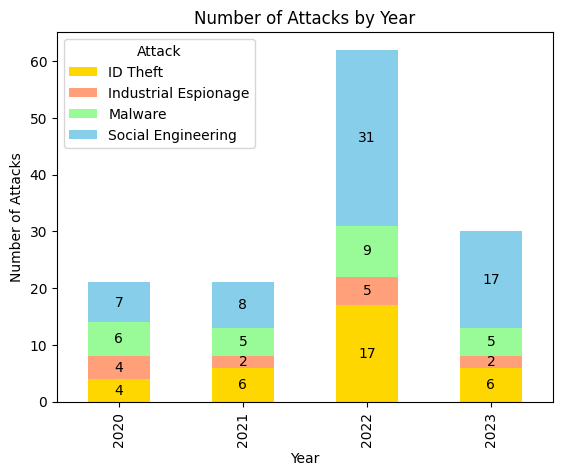

In [ ]:
import pandas as pd

attacks_by_year_xgb = X_xgb_results.pivot_table(index='Year', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_year_xgb['Total Attacks'] = attacks_by_year_xgb.sum(axis=1)

attacks_by_year_xgb = attacks_by_year_xgb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_year_xgb.columns.name = 'Attack'
attacks_by_year_xgb.index.name = 'Year'

#print(attacks_by_year_xgb)

attacks_by_year_xgb.drop('Total Attacks', axis=1, inplace=True)

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

ax = attacks_by_year_xgb.plot(kind='bar', stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year')

plt.show()

***Attacks Location Wise***

In [ ]:
attacks_by_location_xgb = X_xgb_results.pivot_table(index='Location', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_location_xgb['Total Attacks'] = attacks_by_location_xgb.sum(axis=1)

attacks_by_location_xgb = attacks_by_location_xgb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_location_xgb.columns.name = 'Attack'
attacks_by_location_xgb.index.name = 'Year'

#print(attacks_by_location_xgb)

attacks_by_location_xgb.drop('Total Attacks', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_location_xgb.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('City')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by City')

plt.show()

KeyError: 'Location'

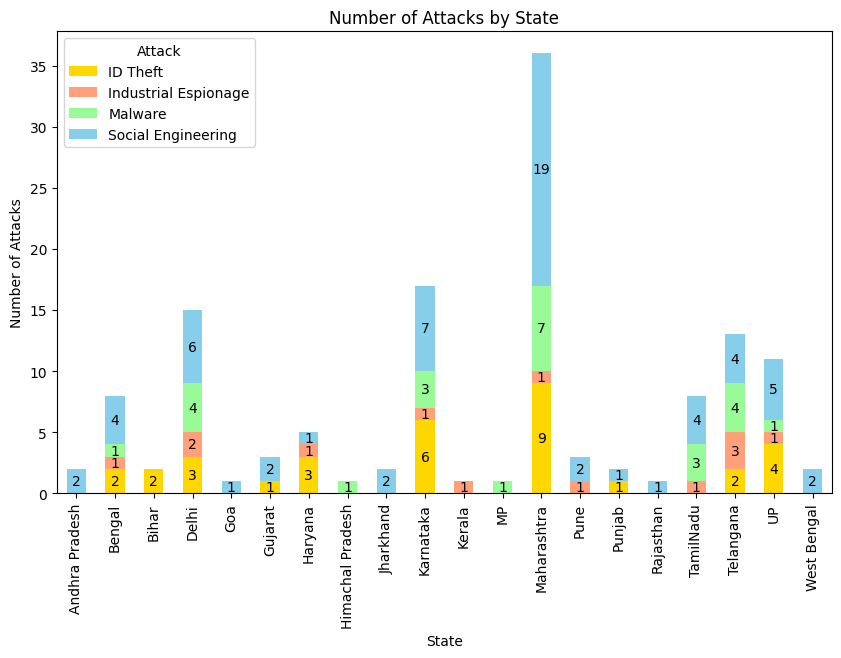

In [ ]:
attacks_by_state_xgb = X_xgb_results.pivot_table(index='State', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_state_xgb['Total Attacks'] = attacks_by_state_xgb.sum(axis=1)

attacks_by_state_xgb = attacks_by_state_xgb.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_state_xgb.columns.name = 'Attack'
attacks_by_state_xgb.index.name = 'Year'

attacks_by_state_xgb.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_state_xgb)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_state_xgb.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('State')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by State')

plt.show()

***Performance Analysis XGBoost***

***Confusion Matrix XGBoost***

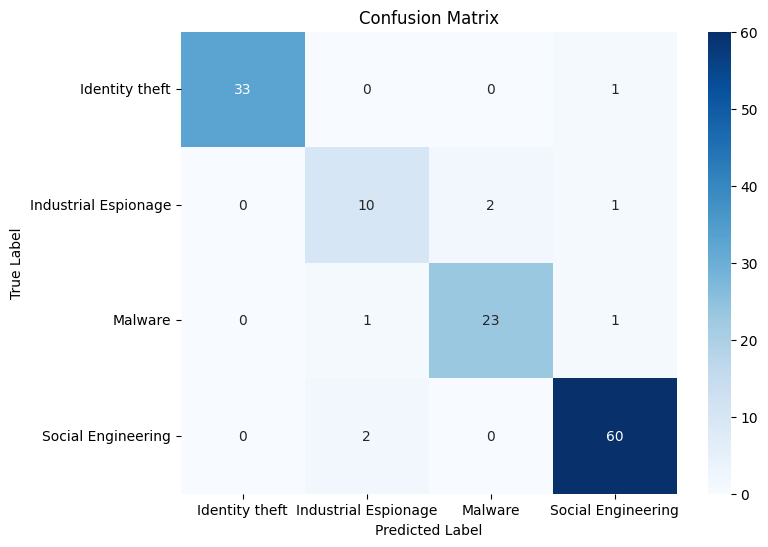

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test_encoded, predictions_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
different_predictions_xgb = X_xgb_results[X_xgb_results['Attack'] != X_xgb_results['Predicted Attack']]

different_predictions_xgb.to_excel("MisClassified_XGB.xlsx", index=False)
print(different_predictions_xgb)

                                      Incident  Offender      Victim  \
403                                data breach    hacker     company   
126                    cyber extortion company  criminal     company   
422                     malware attack website    hacker     company   
377  social engineering attack investment firm  criminal     company   
275                              phishing scam    hacker    software   
286                              phishing scam  criminal  individual   
437     social engineering attack retail chain  criminal     company   
383             data breach e-commerce company    hacker     company   

                           Harm  Year      State  Attack  Predicted Attack  
403                   loss data  2020  Telangana       1                 2  
126             loss reputation  2021  Karnataka       1                 3  
422  loss intellectual property  2020     Kerala       2                 1  
377              financial loss  2023    Ha

# **Algorithms Comparison**

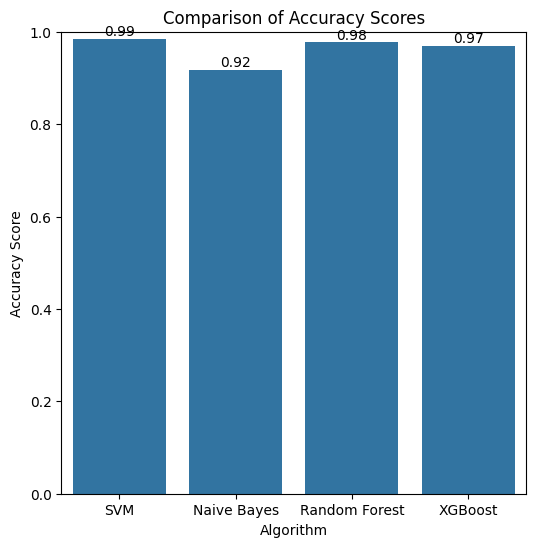

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report


accuracies = {
    'SVM': accuracy_svm,
    'Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf,
    'XGBoost': accuracy_xgb
}

# Plotting accuracy scores
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Comparison of Accuracy Scores')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)

for i, acc in enumerate(accuracies.values()):
    ax.text(i, acc, f'{acc:.2f}', ha='center', va='bottom')

plt.show()

# ***Classification***

In [ ]:
X_total = X['Incident'] + ' ' + X['Offender'] + ' ' + X['Harm'] + ' ' + X['Victim']

X_total_tfidf = vectorizer.transform(X_total)

In [ ]:
predictions_svm_total = svm_classifier.predict(X_total_tfidf)

In [ ]:
X_svm_results_total = X.copy()
X_svm_results_total['Attack'] = Y
X_svm_results_total['Predicted Attack'] = predictions_svm_total
print(X_svm_results_total)

                            Incident  Offender           Victim  \
0            steal confidential data    hacker          company   
1                    fake dealership  criminal  st cruz company   
2            steal confidential data    hacker          company   
3                          otp theft  criminal       individual   
4                      duping person  criminal       individual   
..                               ...       ...              ...   
441           real estate firm fraud  criminal          company   
442   malware attack private company    hacker          company   
443        phishing scam bank detail  criminal       individual   
444  fake identity ( social medium )  criminal       individual   
445                       start scam  criminal       individual   

                Harm  Year   Location        State       Amount  \
0    loss reputation  2022  Hyderabad    Telangana          NaN   
1          loss data  2022        Goa          Goa  12.75 Lak

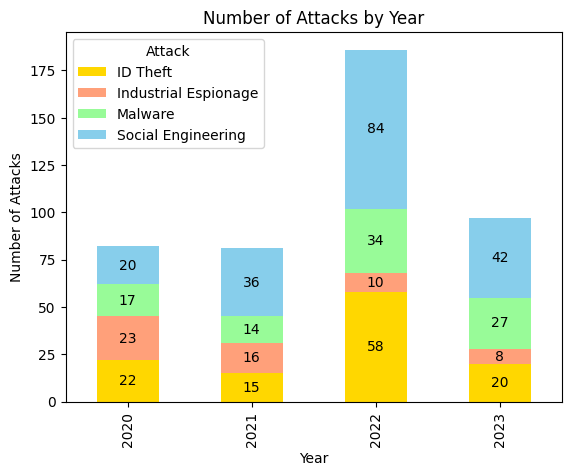

In [ ]:
import pandas as pd

attacks_by_year_total = X_svm_results_total.pivot_table(index='Year', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_year_total['Total Attacks'] = attacks_by_year_total.sum(axis=1)

attacks_by_year_total = attacks_by_year_total.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_year_total.columns.name = 'Attack'
attacks_by_year_total.index.name = 'Year'

#print(attacks_by_year_total)

attacks_by_year_total.drop('Total Attacks', axis=1, inplace=True)

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

ax = attacks_by_year_total.plot(kind='bar', stacked=True, color=colors)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

plt.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks by Year')

plt.show()

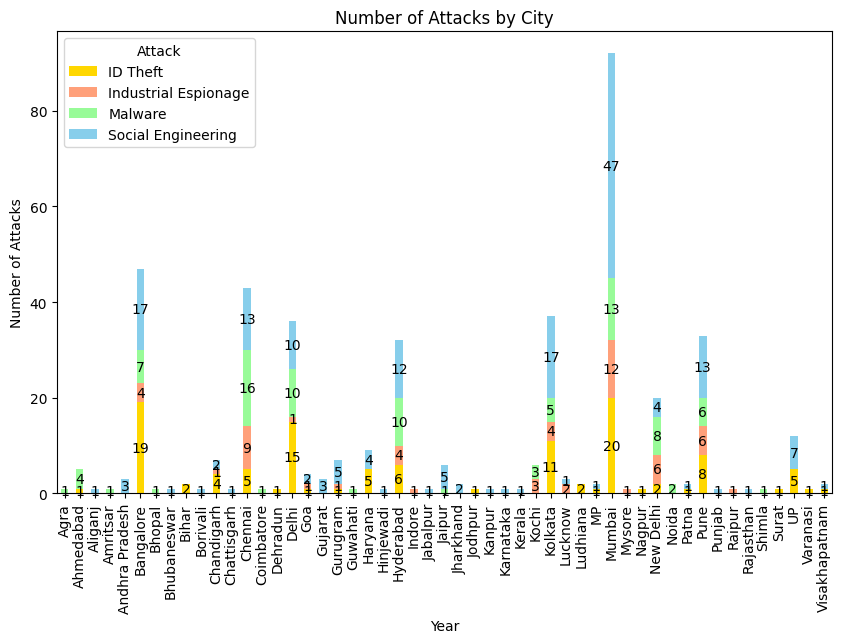

In [ ]:
attacks_by_location_total = X_svm_results_total.pivot_table(index='Location', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_location_total['Total Attacks'] = attacks_by_location_total.sum(axis=1)

attacks_by_location_total = attacks_by_location_total.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_location_total.columns.name = 'Attack'
attacks_by_location_total.index.name = 'Year'

attacks_by_location_total.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_location_total)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_location_total.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by City')

plt.show()

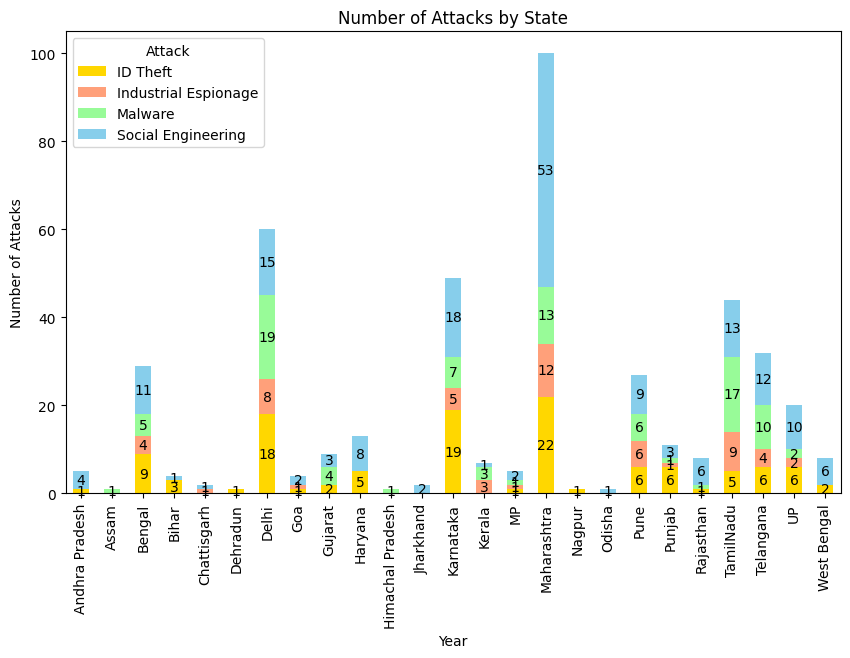

In [ ]:
attacks_by_state_total = X_svm_results_total.pivot_table(index='State', columns='Predicted Attack', aggfunc='size', fill_value=0)

attacks_by_state_total['Total Attacks'] = attacks_by_state_total.sum(axis=1)

attacks_by_state_total = attacks_by_state_total.rename(columns={
    'Social Engineering': 'SE',
    'Industrial Espionage': 'IE',
    'ID Theft': 'ID theft',
    'Malware': 'Malware'
})

attacks_by_state_total.columns.name = 'Attack'
attacks_by_state_total.index.name = 'Year'

attacks_by_state_total.drop('Total Attacks', axis=1, inplace=True)

#print(attacks_by_state_total)

fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#FFD700', '#FFA07A', '#98FB98', '#87CEEB']

attacks_by_state_total.plot(kind='bar', stacked=True, color=colors, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center')

ax.legend(title='Attack', loc='upper left', labels=['ID Theft','Industrial Espionage', 'Malware', 'Social Engineering',])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Attacks')
ax.set_title('Number of Attacks by State')

plt.show()

In [ ]:
accuracy_svm_total = accuracy_score(Y, predictions_svm_total)
print(f'Accuracy: {accuracy_svm_total:.2f}')

classification_report_svm_total = classification_report(Y, predictions_svm_total)
print('\nClassification Report:')
print(classification_report_svm_total)

Accuracy: 0.99

Classification Report:
                      precision    recall  f1-score   support

      Identity theft       1.00      0.99      1.00       116
Industrial Espionage       0.98      0.97      0.97        58
             Malware       0.97      0.99      0.98        90
  Social Engineering       0.99      0.99      0.99       182

            accuracy                           0.99       446
           macro avg       0.99      0.99      0.99       446
        weighted avg       0.99      0.99      0.99       446



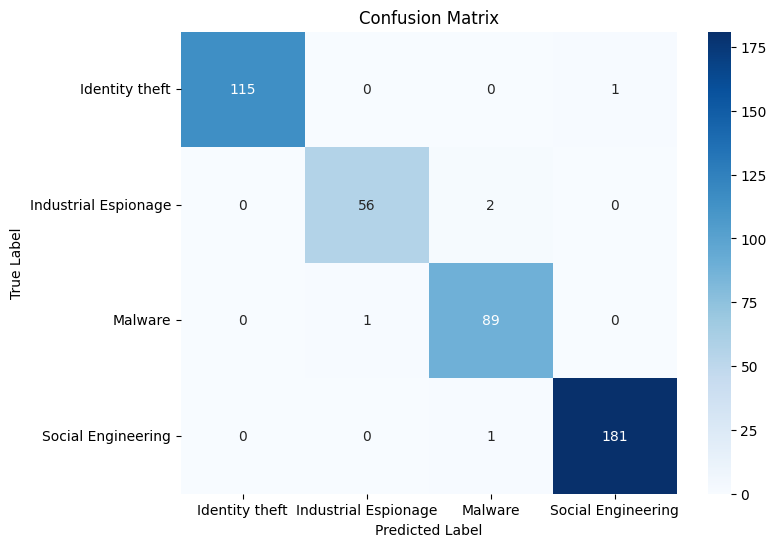

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(Y, predictions_svm_total)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
different_predictions = X_svm_results_total[X_svm_results_total['Attack'] != X_svm_results_total['Predicted Attack']]

different_predictions.to_excel("MisClassified_XGB.xlsx", index=False)
print(different_predictions)

                           Incident  Offender           Victim  \
203                 phishing attack    hacker  system software   
286                   phishing scam  criminal       individual   
383  data breach e-commerce company    hacker          company   
403                     data breach    hacker          company   
422          malware attack website    hacker          company   

                           Harm  Year   Location        State     Amount  \
203                   loss data  2022     Mumbai  Maharashtra    9 Lakhs   
286              financial loss  2023  Hyderabad    Telangana  2.3 Lakhs   
383                   loss data  2020  Hyderabad    Telangana    9 Lakhs   
403                   loss data  2020  Hyderabad    Telangana        NaN   
422  loss intellectual property  2020      Kochi       Kerala      88000   

                   Attack      Predicted Attack  
203    Social Engineering               Malware  
286        Identity theft    Social Engineerin

In [ ]:
import joblib

joblib.dump(svm_classifier, 'svm_model.pkl')
joblib.dump(vectorizer,'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']